In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, RobustScaler

In [3]:
diabetes_data = pd.read_csv('diabetes.csv')
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
diabetes_data['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [6]:
diabetes_data.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [7]:
total_num = diabetes_data["Pregnancies"].count()

In [8]:
test_features = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
for feature in test_features:
    zero_count = diabetes_data[diabetes_data[feature] == 0][feature].count()
    print(feature, "의 값이 0인 개수 :", zero_count,"퍼센트는 : ", "{:.2%}".format(zero_count/total_num))

Glucose 의 값이 0인 개수 : 5 퍼센트는 :  0.65%
BloodPressure 의 값이 0인 개수 : 35 퍼센트는 :  4.56%
SkinThickness 의 값이 0인 개수 : 227 퍼센트는 :  29.56%
Insulin 의 값이 0인 개수 : 374 퍼센트는 :  48.70%
BMI 의 값이 0인 개수 : 11 퍼센트는 :  1.43%


In [9]:
# 0인 데이터를 평균으로 채우기
diabetes_data[test_features].mean()

Glucose          120.894531
BloodPressure     69.105469
SkinThickness     20.536458
Insulin           79.799479
BMI               31.992578
dtype: float64

In [10]:
diabetes_data[test_features] = diabetes_data[test_features].replace(0, diabetes_data[test_features].mean())

In [11]:
X = diabetes_data.drop('Outcome', axis=1)
Y = diabetes_data['Outcome']

In [12]:
# 학습 데이터와 테스트데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=11)

In [13]:
# 각 스케일러를 사용해보기
scalers = {
    "StandardScaler": StandardScaler(),
    "MinMaxScaler": MinMaxScaler(),
    "MaxAbsScaler": MaxAbsScaler(),
    "RobustScaler": RobustScaler()
}

In [14]:
# for 문으로 각 스케일러를 적용한 결과를 비교해보기
results = {}

for scaler_name, scaler in scalers.items():
    # x_train 스케일
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # decision tree 모델 설정
    model = DecisionTreeClassifier()
    model.fit(X_train_scaled, y_train)

    # 예측하기
    pred = model.predict(X_test_scaled)

    # 평가하기
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)

    # 결과 저장하기
    results[scaler_name] = {
        "accuracy":accuracy,
        "precision":precision,
        "recall": recall,
        "f1": f1
    }

In [15]:
for scaler_name, metics in results.items():
    print(scaler_name, "결과 출력해보기")
    for metrics_name, value in metics.items():
        print("{}의 값은 : {:.2f}".format(metrics_name, value))
    print("-"*10)

StandardScaler 결과 출력해보기
accuracy의 값은 : 0.71
precision의 값은 : 0.60
recall의 값은 : 0.56
f1의 값은 : 0.58
----------
MinMaxScaler 결과 출력해보기
accuracy의 값은 : 0.71
precision의 값은 : 0.60
recall의 값은 : 0.57
f1의 값은 : 0.58
----------
MaxAbsScaler 결과 출력해보기
accuracy의 값은 : 0.71
precision의 값은 : 0.60
recall의 값은 : 0.57
f1의 값은 : 0.58
----------
RobustScaler 결과 출력해보기
accuracy의 값은 : 0.71
precision의 값은 : 0.59
recall의 값은 : 0.59
f1의 값은 : 0.59
----------


In [16]:
# ROC AUC 곡선 그리기
y_pred_proba = model.predict_proba(X_test_scaled)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

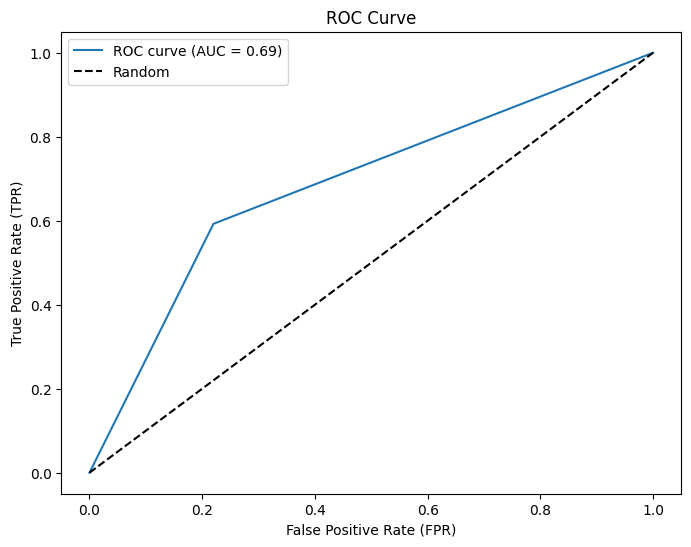

In [17]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [18]:
# 임계값에 따른 F1 스코어 계산
f1_scores = []
for threshold in thresholds:
    y_pred_threshold = (y_pred_proba >= threshold).astype(int)
    f1 = f1_score(y_test, y_pred_threshold)
    f1_scores.append(f1)

# 최적의 임계값 찾기
optimal_threshold = thresholds[np.argmax(f1_scores)]
optimal_f1 = max(f1_scores)

print(f"Optimal Threshold: {optimal_threshold}")
print(f"Optimal F1 Score: {optimal_f1:.4f}")

# 최적의 임계값 적용 후 성능 평가
y_pred_optimal = (y_pred_proba >= optimal_threshold).astype(int)
accuracy_optimal = accuracy_score(y_test, y_pred_optimal)
precision_optimal = precision_score(y_test, y_pred_optimal)
recall_optimal = recall_score(y_test, y_pred_optimal)

print("\n최적의 임계값 적용 결과:")
print(f"Accuracy: {accuracy_optimal:.4f}")
print(f"Precision: {precision_optimal:.4f}")
print(f"Recall: {recall_optimal:.4f}")
print(f"F1 Score: {optimal_f1:.4f}")

Optimal Threshold: 1.0
Optimal F1 Score: 0.5926

최적의 임계값 적용 결과:
Accuracy: 0.7143
Precision: 0.5926
Recall: 0.5926
F1 Score: 0.5926


: 